<a href="https://colab.research.google.com/github/surajkonline/R-D-AIML-workshop/blob/main/Auot_MPG_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing numpy, pandas & matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Reading the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/surajkonline/R-D-AIML-workshop/surajkonline-Regression_auto_mpg/auto-mpg.csv') 

In [ ]:
# Removing "?" from horsepower & converting it from object to numeric
df = df.drop(df[df.horsepower =="?"].index)
df['horsepower']=pd.to_numeric(df['horsepower'])

In [ ]:
df.info()

In [ ]:
# Dropping car name as we don't intend it to keep in the model
df.drop(['car name','origin', 'model year'],axis=1, inplace=True)

In [ ]:
df

In [ ]:
sns.histplot(data=df, x="mpg");

In [ ]:
# Converting mpg into three categories "Low", "Medium" & "high"
df['mpg'] = pd.qcut(df['mpg'], 3, labels=["Low", "Medium", "High"])

In [ ]:
# Checking the mpg distribution
sns.histplot(data=df, x="mpg");

In [ ]:
colors = ['red', 'blue', 'green']
sns.pairplot(df,palette=sns.xkcd_palette(colors),hue= "mpg", corner=True)
plt.show()

In [ ]:
# Naming columns
col_names = ['cylinders',	'displacement',	'horsepower','weight',	'acceleration']
col_names

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [ ]:
#X = df.drop(['mpg'], axis=1)
X=df[col_names]
y = df['mpg']

In [ ]:
X

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix # Model validation score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# For stratifid splitting of train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test

In [ ]:
# Fitting the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#predicting on test dataset
y_pred_test = clf.predict(X_test)
y_pred_train= clf.predict(X_train)

In [ ]:
# Model performance 
print ('\033[1m''Accuracy Score of Training data is:',accuracy_score(y_train, y_pred_train))
print('\033[1m''Accuracy Score of Test data is:',accuracy_score(y_test, y_pred_test))
print('Classification report is: \n',classification_report(y_test, y_pred_test))
pd.crosstab(y_test, y_pred_test, rownames= ['True'],colnames=['Predicted'], margins=True)

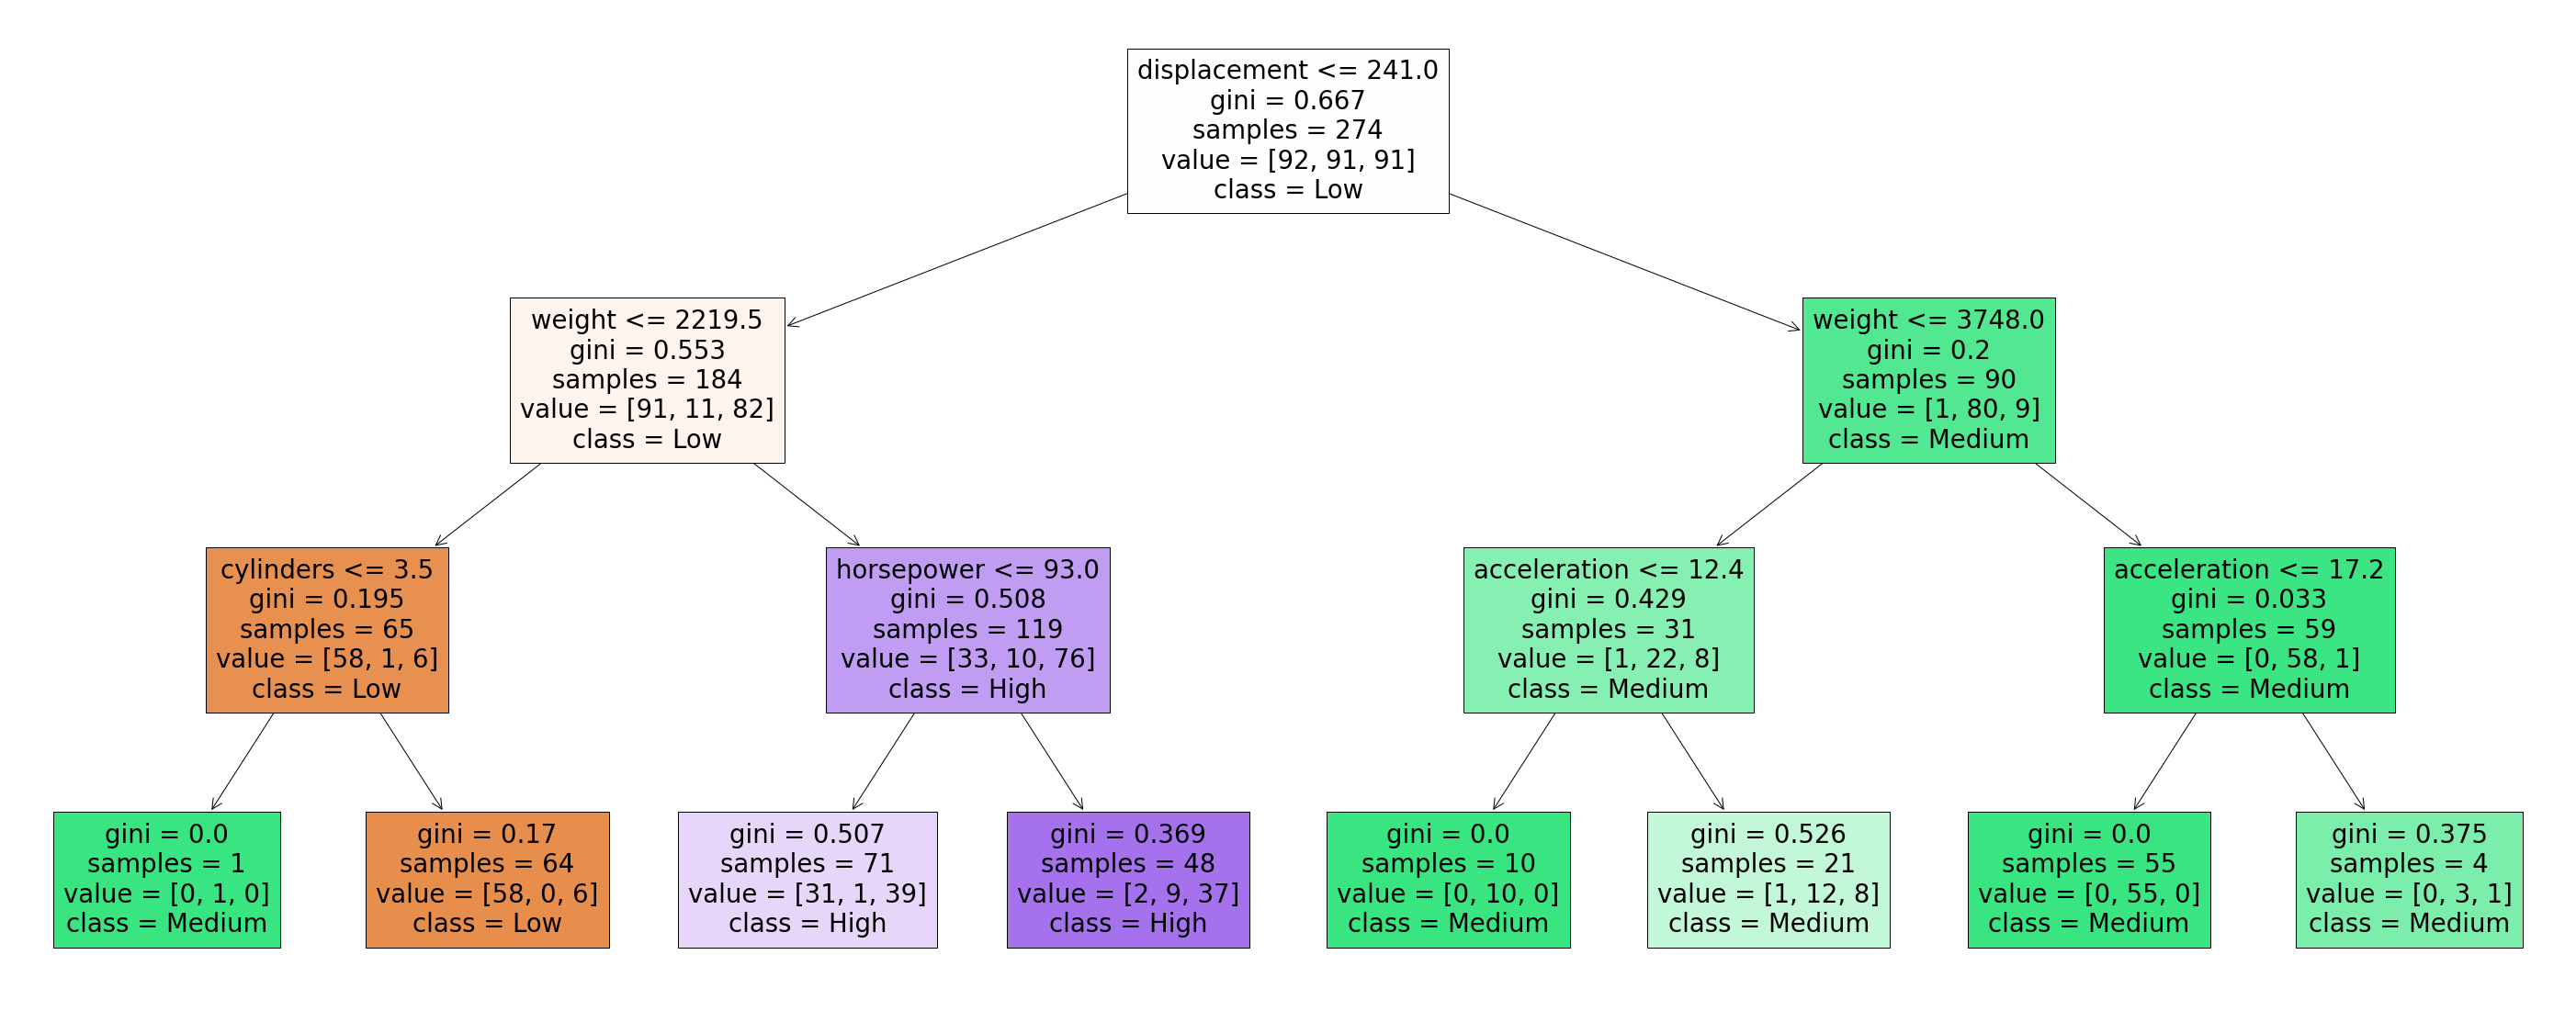

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(clf,
feature_names=col_names,class_names=["Low","Medium", "High"],
filled=True)


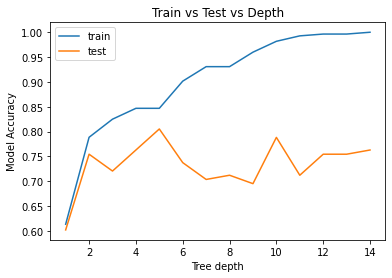

,train,test
1,0.613139,0.601695
2,0.788321,0.754237
3,0.824818,0.720339
4,0.846715,0.762712
5,0.846715,0.805085
6,0.901460,0.737288
7,0.930657,0.703390
8,0.930657,0.711864
9,0.959854,0.694915
10,0.981752,0.788136


In [ ]:
j=1
train=[]
test=[]
while j<15:
  X_train, X_test, y_train,y_test= train_test_split(X,y, stratify=y, test_size=0.3)
  model= DecisionTreeClassifier(max_depth=j)
  model.fit(X_train, y_train)
  RF_training_labels= model.predict(X_train)
  RF_testing_labels= model.predict (X_test)
  train.append(accuracy_score(y_train, RF_training_labels))
  test.append(accuracy_score(y_test, RF_testing_labels))
  j= j+1
  accuracy_frame= pd.DataFrame ({"train": train, "test": test})
  accuracy_frame.index= np.arange (1, len(accuracy_frame)+1)
(accuracy_frame,accuracy_frame.plot.line(title= "Train vs Test vs Depth"))
plt.ylabel('Model Accuracy')
plt.xlabel('Tree depth')
plt.show()
accuracy_frame

In [ ]:
# To see Decision tree in text form ##
from sklearn.tree import export_text
r = export_text(clf, feature_names=col_names)
print(r)

|--- displacement <= 241.00
|   |--- weight <= 2219.50
|   |   |--- cylinders <= 3.50
|   |   |   |--- class: Low
|   |   |--- cylinders >  3.50
|   |   |   |--- class: High
|   |--- weight >  2219.50
|   |   |--- horsepower <= 93.00
|   |   |   |--- class: Medium
|   |   |--- horsepower >  93.00
|   |   |   |--- class: Medium
|--- displacement >  241.00
|   |--- weight <= 3748.00
|   |   |--- acceleration <= 12.40
|   |   |   |--- class: Low
|   |   |--- acceleration >  12.40
|   |   |   |--- class: Low
|   |--- weight >  3748.00
|   |   |--- acceleration <= 17.20
|   |   |   |--- class: Low
|   |   |--- acceleration >  17.20
|   |   |   |--- class: Low

